## keras 인스톨

In [68]:
from keras.datasets import mnist

In [69]:
! pip install tensorflow



In [70]:
! pip install keras

위와 같은 방법으로 쥬피터노트북 안에서 pip install 명령어를 사용해서 모듈을 인스톨 할 수 있습니다.

다시 ```from keras.datasets import minist``` 를 실행해서 minist 데이터셋을 불러오겠습니다.

## MNIST 데이터셋 다운로드

In [24]:
from keras.datasets import mnist

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

mnist 데이터셋은 숫자 손글씨에 대한 28 x 28 픽셀 데이터입니다.  트레이닝셋에는 6만개, 테스트셋에는 1만개의 데이터가 있습니다.

이미지 데이터와 레이블 데이터의 타입과 그 내용을 살펴보겠습니다.

## MNIST 데이터 살펴보기
- 타입 : Numpy 배열
- 내용 : 0에서 255까지의 정수로 명암을 표현한 배열, 0이 많은 것으로 보아 글씨가 아닌 부분이 0으로 표현 된 것으로 추론

In [26]:
type(train_images), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [27]:
len(train_images), len(train_labels)

(60000, 60000)

In [28]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### 위의 배열이 나타내는 숫자는 5입니다.

In [29]:
train_labels[0]

5

### 위의 배열을 그림으로 그려서 숫자 5인지 확인해보겠습니다
- 그림을 그리기 위해서는 pip install matplotlib 을 실행시켜서 matplotlib 모듈을 설치해야 합니다.

In [30]:
!pip install matplotlib

In [31]:
import matplotlib.pyplot as plt

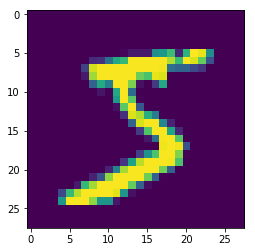

In [32]:
plt.imshow(train_images[0])
plt.show()

### 트레이닝셋과 테스트셋 데이터의 차원을 확인합니다
- shape

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
test_images.shape

(10000, 28, 28)

## 신경망 모델을 keras 로 만들기

In [35]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax', input_shape=(512,)))

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [36]:
1

1

In [37]:
1,

(1,)

### 데이터 정규화

In [38]:
train_X = train_images.reshape(60000, -1)
train_X = train_X.astype('float') / 255

test_X = test_images.reshape(10000, -1)
test_X = test_X.astype('float') / 255

### 레이블데이터  one-hot encoding 하기
- 0부터 9까지 레이블의 종류가 있고 레이블 값이 5라면 인덱스 5 위치에만 1이 오고 나머지는 0으로 채워진 벡터로 만드는 것을 원핫인코딩이라고 합니다.

In [39]:
from keras.utils import to_categorical

train_Y = to_categorical(train_labels)
test_Y  = to_categorical(test_labels)

In [40]:
train_Y[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

## 머신러닝 훈련 과정

In [41]:
network.fit(train_X, train_Y, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 19s 317us/step - loss: 0.2692 - acc: 0.9225
Epoch 2/5
60000/60000 [==============================] - 17s 277us/step - loss: 0.1106 - acc: 0.9674
Epoch 3/5
60000/60000 [==============================] - 16s 270us/step - loss: 0.0729 - acc: 0.9787
Epoch 4/5
60000/60000 [==============================] - 17s 276us/step - loss: 0.0518 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 17s 280us/step - loss: 0.0377 - acc: 0.9889


## 테스트셋을 사용해서 평가
- 정확도 98%

In [53]:
test_loss, test_acc = network.evaluate(test_X, test_Y)

10000/10000 [==============================] - 2s 187us/step


In [54]:
print('Accuracy : {:.3f}'.format(test_acc))

Accuracy : 0.979


## 신경망 모델이 잘 못 예측한 데이터 살펴보기

### 데이터 예측

In [58]:
test_pred = network.predict_classes(test_X)
print(test_pred)

[7 2 1 ..., 4 5 6]


In [59]:
import numpy as np

In [60]:
correctly_predicted = np.equal(test_pred, test_labels)

In [61]:
print(correctly_predicted)

[ True  True  True ...,  True  True  True]


In [62]:
wrong_predictions = np.where(correctly_predicted == False)[0];  
print(wrong_predictions)

[   8  115  247  259  290  321  340  381  445  449  495  582  619  659  691
  720  877  938  947  951  956  965 1014 1112 1156 1178 1181 1182 1226 1232
 1247 1319 1326 1328 1393 1395 1425 1444 1494 1522 1530 1549 1553 1609 1681
 1717 1722 1790 1878 1901 2004 2035 2044 2052 2053 2070 2093 2109 2118 2130
 2135 2182 2185 2189 2272 2293 2387 2406 2408 2414 2454 2488 2582 2607 2635
 2648 2654 2760 2836 2877 2896 2915 2939 2953 3005 3060 3073 3117 3422 3474
 3503 3520 3558 3559 3567 3597 3718 3727 3776 3780 3796 3808 3811 3818 3838
 3853 3906 3941 3943 4007 4027 4065 4075 4078 4140 4163 4176 4199 4224 4248
 4289 4294 4369 4497 4500 4536 4601 4635 4639 4731 4740 4761 4807 4814 4823
 4860 4879 4880 4956 4966 5331 5457 5600 5642 5676 5734 5926 5936 5937 5955
 5972 5973 6011 6023 6030 6045 6059 6166 6532 6555 6560 6571 6574 6576 6597
 6625 6651 6755 6783 7154 7216 7921 8020 8062 8094 8183 8246 8279 8325 8408
 8413 8527 9009 9015 9024 9280 9500 9587 9634 9642 9664 9679 9692 9698 9700
 9729 9745 9

4


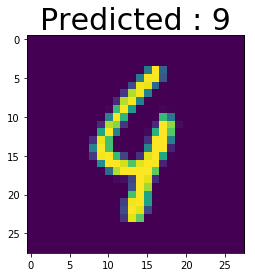

In [64]:
wrong_prediction = wrong_predictions[1]
plt.imshow(test_images[wrong_prediction])
plt.title('Predicted : {}'.format(test_pred[wrong_prediction]), fontsize=30)
print(train_labels[wrong_predictions[1]])

## 신경망을 더 쌓으면 정확도가 높아지는가?

In [65]:
network_deep = models.Sequential()

network_deep.add(layers.Dense(units=512, activation='relu', input_shape=(28*28,)))
network_deep.add(layers.Dense(units=256, activation='relu'))
network_deep.add(layers.Dense(units=256, activation='relu'))
network_deep.add(layers.Dense(units=10, activation='softmax'))

network_deep.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [66]:
network_deep.fit(train_X, train_Y, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 28s 468us/step - loss: 0.2283 - acc: 0.9325
Epoch 2/5
60000/60000 [==============================] - 24s 397us/step - loss: 0.0827 - acc: 0.9742
Epoch 3/5
60000/60000 [==============================] - 25s 410us/step - loss: 0.0558 - acc: 0.9827
Epoch 4/5
60000/60000 [==============================] - 25s 414us/step - loss: 0.0394 - acc: 0.9874
Epoch 5/5
60000/60000 [==============================] - 26s 427us/step - loss: 0.0338 - acc: 0.9888


In [67]:
_ , acc_deep = network_deep.evaluate(test_X, test_Y)
print('Accuracy of deep network : {:.3f}'.format(acc_deep))

10000/10000 [==============================] - 4s 350us/step
Accuracy of deep network : 0.979


### 꼭 그렇지는 않다